In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('winequality-red.csv')


In [2]:
# Quick glance at column names
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [3]:
# Check first 5 rows
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
print("Number of rows: ", str(data.shape[0]))
print("Number of columns: ", str(data.shape[1]))

Number of rows:  1599
Number of columns:  12


In [5]:
# check the distribution
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
# check any null, data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
data.isnull().sum()

# no null values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

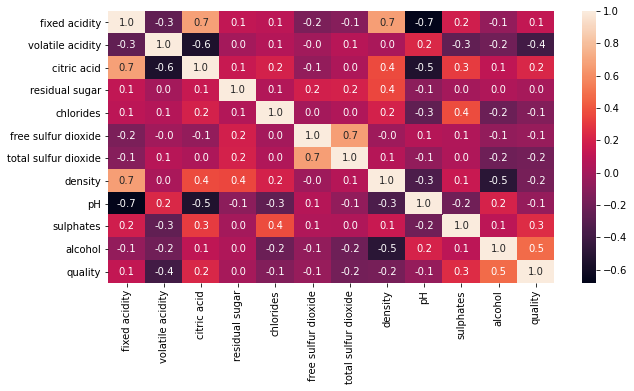

In [8]:
# correlation matrix

plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True, fmt='0.1f')

# note: mostly weak positive or negative correlation between Quality and X features

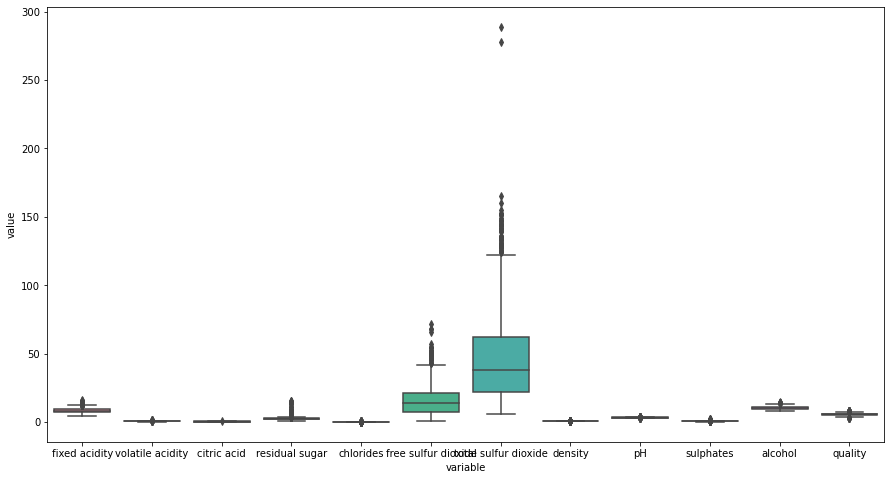

In [9]:
# use box plot to see data distribution

plt.figure(figsize=(15,8))

sns.boxplot(x="variable", y="value", data=pd.melt(data))

plt.show()

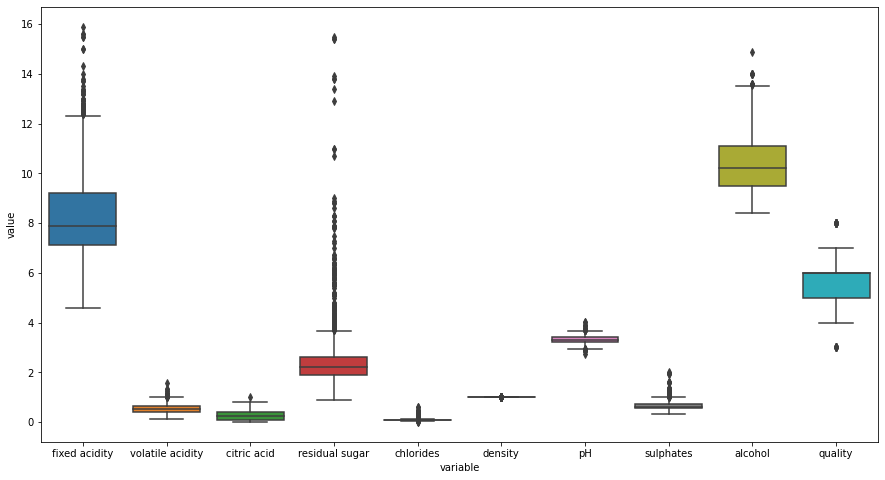

In [10]:
# variables free sulphur diocide and total sulphur diocide
# have much wider value range than other 9 variables
# temporary remove to have a clearer look at the distribution

wine_drop_sulfur = data.drop(['free sulfur dioxide','total sulfur dioxide'], axis=1)

plt.figure(figsize=(15,8))

sns.boxplot(x="variable", y="value", data=pd.melt(wine_drop_sulfur))

plt.show()

In [11]:
# binarization of target variable

unique_quality_values = data['quality'].unique()
print(unique_quality_values)

print('---------------')
print(str(len(data['quality'].unique())) + " unique target variable values.")

[5 6 7 4 8 3]
---------------
6 unique target variable values.


In [12]:
quality_values = data['quality'].value_counts(normalize=True).round(2)*100

pd.DataFrame(quality_values)

# note: over 80% of data in 5 and 6 scale, followed by 7 (12%) and 4 (3%)

,quality
5,43.0
6,40.0
7,12.0
4,3.0
8,1.0
3,1.0


In [13]:
data['quality'] = [1 if x>=7 else 0 for x in data['quality']]

In [14]:
# check that binarization is successful
data['quality'].unique()

array([0, 1])

In [15]:
# check data balance
# note that the value is skewed towards quality = 0
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [16]:
# create a copy of data for subsequent deployment 
## planned to use full raw data to build final prototype ML model
data2 = data.copy()

In [17]:
# first get the matrix (X) and target variable (y)

X = data.drop(['quality'], axis=1)
y = data['quality']

In [18]:
# split test/train - 75/25
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, random_state=42)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression Model
logr = LogisticRegression()
logr.fit(X_train, y_train)
y_pred1 = logr.predict(X_test)
# svc
svm = svm.SVC()
svm.fit(X_train, y_train)
y_pred2 = svm.predict(X_test)
# KNeighbours Classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred3 = knn.predict(X_test)
# Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred4 = dt.predict(X_test)
# Random Forest Classifierrf = RandomForestClassifier()
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred5 = rf.predict(X_test)

/Users/jean/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [21]:
score_board = pd.DataFrame({'Models': ['LR', 'SVC', 'KNN', 'DT', 'RF'],
 
              'ACC':[accuracy_score(y_test, y_pred1)*100,
                    accuracy_score(y_test, y_pred2)*100,
                     accuracy_score(y_test, y_pred3)*100,
                     accuracy_score(y_test, y_pred4)*100,
                     accuracy_score(y_test, y_pred5)*100,],
              'Precision': [precision_score(y_test, y_pred1)*100,
                           precision_score(y_test, y_pred2)*100,
                           precision_score(y_test, y_pred3)*100,
                           precision_score(y_test, y_pred4)*100,
                           precision_score(y_test, y_pred5)*100,],
              'Recall': [recall_score(y_test, y_pred1)*100,
                        recall_score(y_test, y_pred2)*100,
                         recall_score(y_test, y_pred3)*100,
                         recall_score(y_test, y_pred4)*100,
                         recall_score(y_test, y_pred5)*100,
                        ],
              'f1': [f1_score(y_test, y_pred1)*100,
                    f1_score(y_test, y_pred2)*100,
                    f1_score(y_test, y_pred3)*100,
                    f1_score(y_test, y_pred4)*100,
                    f1_score(y_test, y_pred5)*100,
                    ]
              
})

score_board

# note: Random Forest Model has the highest in accuracy value, most import for Classification

,Models,ACC,Precision,Recall,f1
0,LR,87.50,57.142857,22.641509,32.432432
1,SVC,87.00,100.000000,1.886792,3.703704
2,KNN,86.25,46.153846,22.641509,30.379747
3,DT,89.50,59.322034,66.037736,62.500000
4,RF,90.50,69.230769,50.943396,58.695652


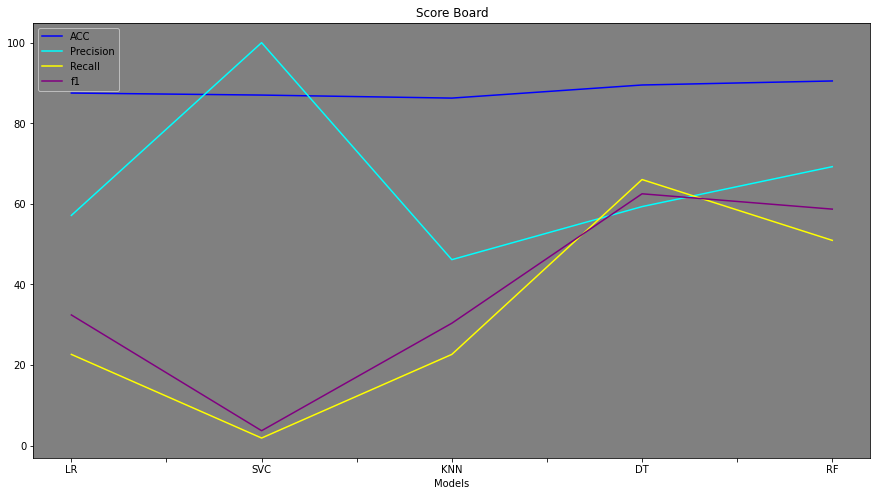

In [22]:
# score board for accuracy, precision, recall and f1 scores

plt.figure(figsize=(15,8))
plt.rcParams['axes.facecolor'] = 'grey'


#Get current axis
ax = plt.gca() 
  
# line plot for Accuracy
score_board.plot(kind = 'line',
        x = 'Models',
        y = 'ACC',
        color = 'blue',ax = ax)
  
# line plot for Precision
score_board.plot(kind = 'line',
        x = 'Models',
        y = 'Precision',
        color = 'cyan', ax = ax)

# line plot for Recall
score_board.plot(kind = 'line',
        x = 'Models',
        y = 'Recall',
        color = 'yellow',ax = ax)

# line plot for Recall
score_board.plot(kind = 'line',
        x = 'Models',
        y = 'f1',
        color = 'purple',ax = ax)

# set the title
plt.title('Score Board')

# show the plot
plt.show()

# note: Accuracy comparison across models showed a relativley flat line

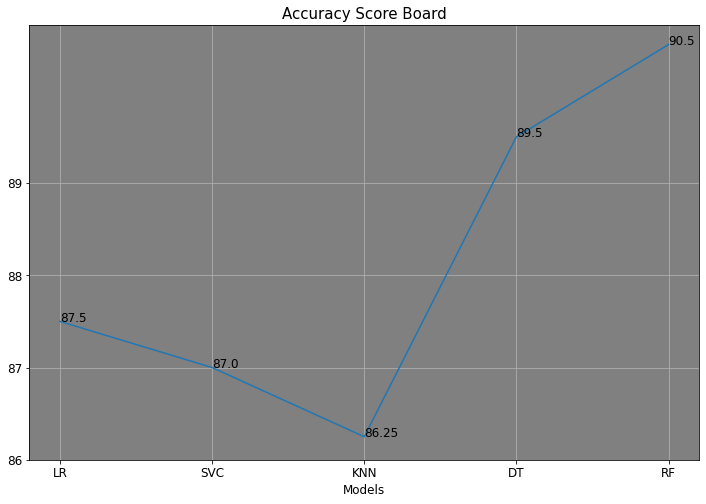

In [23]:
# zoom in to Accuracy to take a closer look 

import matplotlib.pyplot as plt

x = score_board['Models']
y = score_board['ACC']

fig, ax = plt.subplots(figsize=(12,8))
plt.plot(x, y)
plt.xlabel("Models", size=12)
plt.title("Accuracy Score Board", size=15)
for index in range(len(x)):
  ax.text(x[index], y[index], y[index], size=12)
plt.xticks(x, size=12)
plt.yticks([i for i in range(86,90)], size=12)
plt.grid()
plt.show()

In [24]:
### Prepare Data for Deployment
### Choice of Random Forest Model
### Full dataset to be used
X = data2.drop('quality', axis=1)
y = data2['quality']

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

In [26]:
# save the model with pickle
import pickle

In [27]:
pickle.dump(rf, open('rf.pkl', 'wb'))

In [28]:
# Test the model
pickled_model = pickle.load(open('rf.pkl', 'rb'))

In [29]:
pickled_model.predict([[7,0.3,0.4,3.0,0.078,15.0,37.0,0.99,3.01,0.86,12.8]])

/Users/jean/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])